In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

In [75]:
boston = load_boston()
print(boston)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [76]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [77]:
print(boston.data)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [78]:
boston.target

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [79]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [80]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [81]:
bs = pd.DataFrame(boston.data)

In [82]:
bs.columns = boston.feature_names

In [83]:
bs['Price'] = boston.target

In [84]:
bs.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  Price  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2

In [85]:
bs.shape

(506, 14)

In [86]:
bs['Price'].shape

(506,)

In [87]:
x = bs.drop('Price',axis =1)
x.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [88]:
y = bs['Price']
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: Price, dtype: float64

In [89]:
y.shape

(506,)

In [90]:
bs.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT       Price  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

In [91]:
bs.corr()

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 -0.356977  0.048788 -0.380051  0.128069 -0.273534   
LSTAT    0.455621 -0.412995  0.603800 -0.053929  0.590879 -0.613808  0.602339   
Price   -0.388305  0.360445 -0.483725  0.175260 -0.427321  0.695360 -0.376955   

              DIS       RAD       TAX   PTRATIO         B     LSTAT     Price  
CRIM    -0.379670  0.625505  0.582764  0.289946 -0.385064  0.455621 -0.388305  
ZN       0.664408 -0.311948 -0.314563 -0.391679  0.175520 -0.412995  0.360445  
INDUS   -0.708027  0.595129  0.720760  0.383248 -0.356977  0.603800 -0.483725  
CHAS    -0.099176 -0.007368 -0.035587 -0.121515  0.048788 -0.053929  0.175260  
NOX     -0.769230  0.611441  0.668023  0.188933 -0.380051  0.590879 -0.427321  
RM       0.205246 -0.209847 -0.292048 -0.355501  0.128069 -0.613808  0.695360  
AGE     -0.747881  0.456022  0.506456  0.261515 -0.273534  0.602339 -0.376955  
DIS      1.000000 -0.494588 -0.534432 -0.232471  0.291512 -0.496996  0.249929  
RAD     -0.494588  1.000000  0.910228  0.464741 -0.444413  0.488676 -0.381626  
TAX     -0.534432  0.910228  1.000000  0.460853 -0.441808  0.543993 -0.468536  
PTRATIO -0.232471  0.464741  0.460853  1.000000 -0.177383  0.374044 -0.507787  
B        0.291512 -0.444413 -0.441808 -0.177383  1.000000 -0.366087  0.333461  
LSTAT   -0.496996  0.488676  0.543993  0.374044 -0.366087  1.000000 -0.737663  
Price    0.249929 -0.381626 -0.468536 -0.507787  0.333461 -0.737663  1.000000

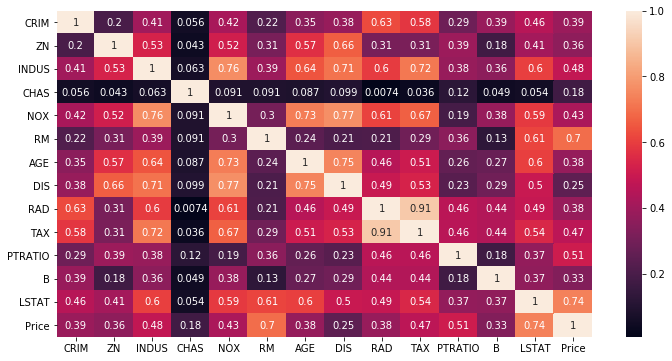

In [92]:
plt.figure(figsize=(12, 6))
sns.heatmap(bs.corr().abs(),  annot=True)

### Observations
* LSTAT,RM,PTRATIO is most correlated with Price
* We may consider al varibales Except CHAS

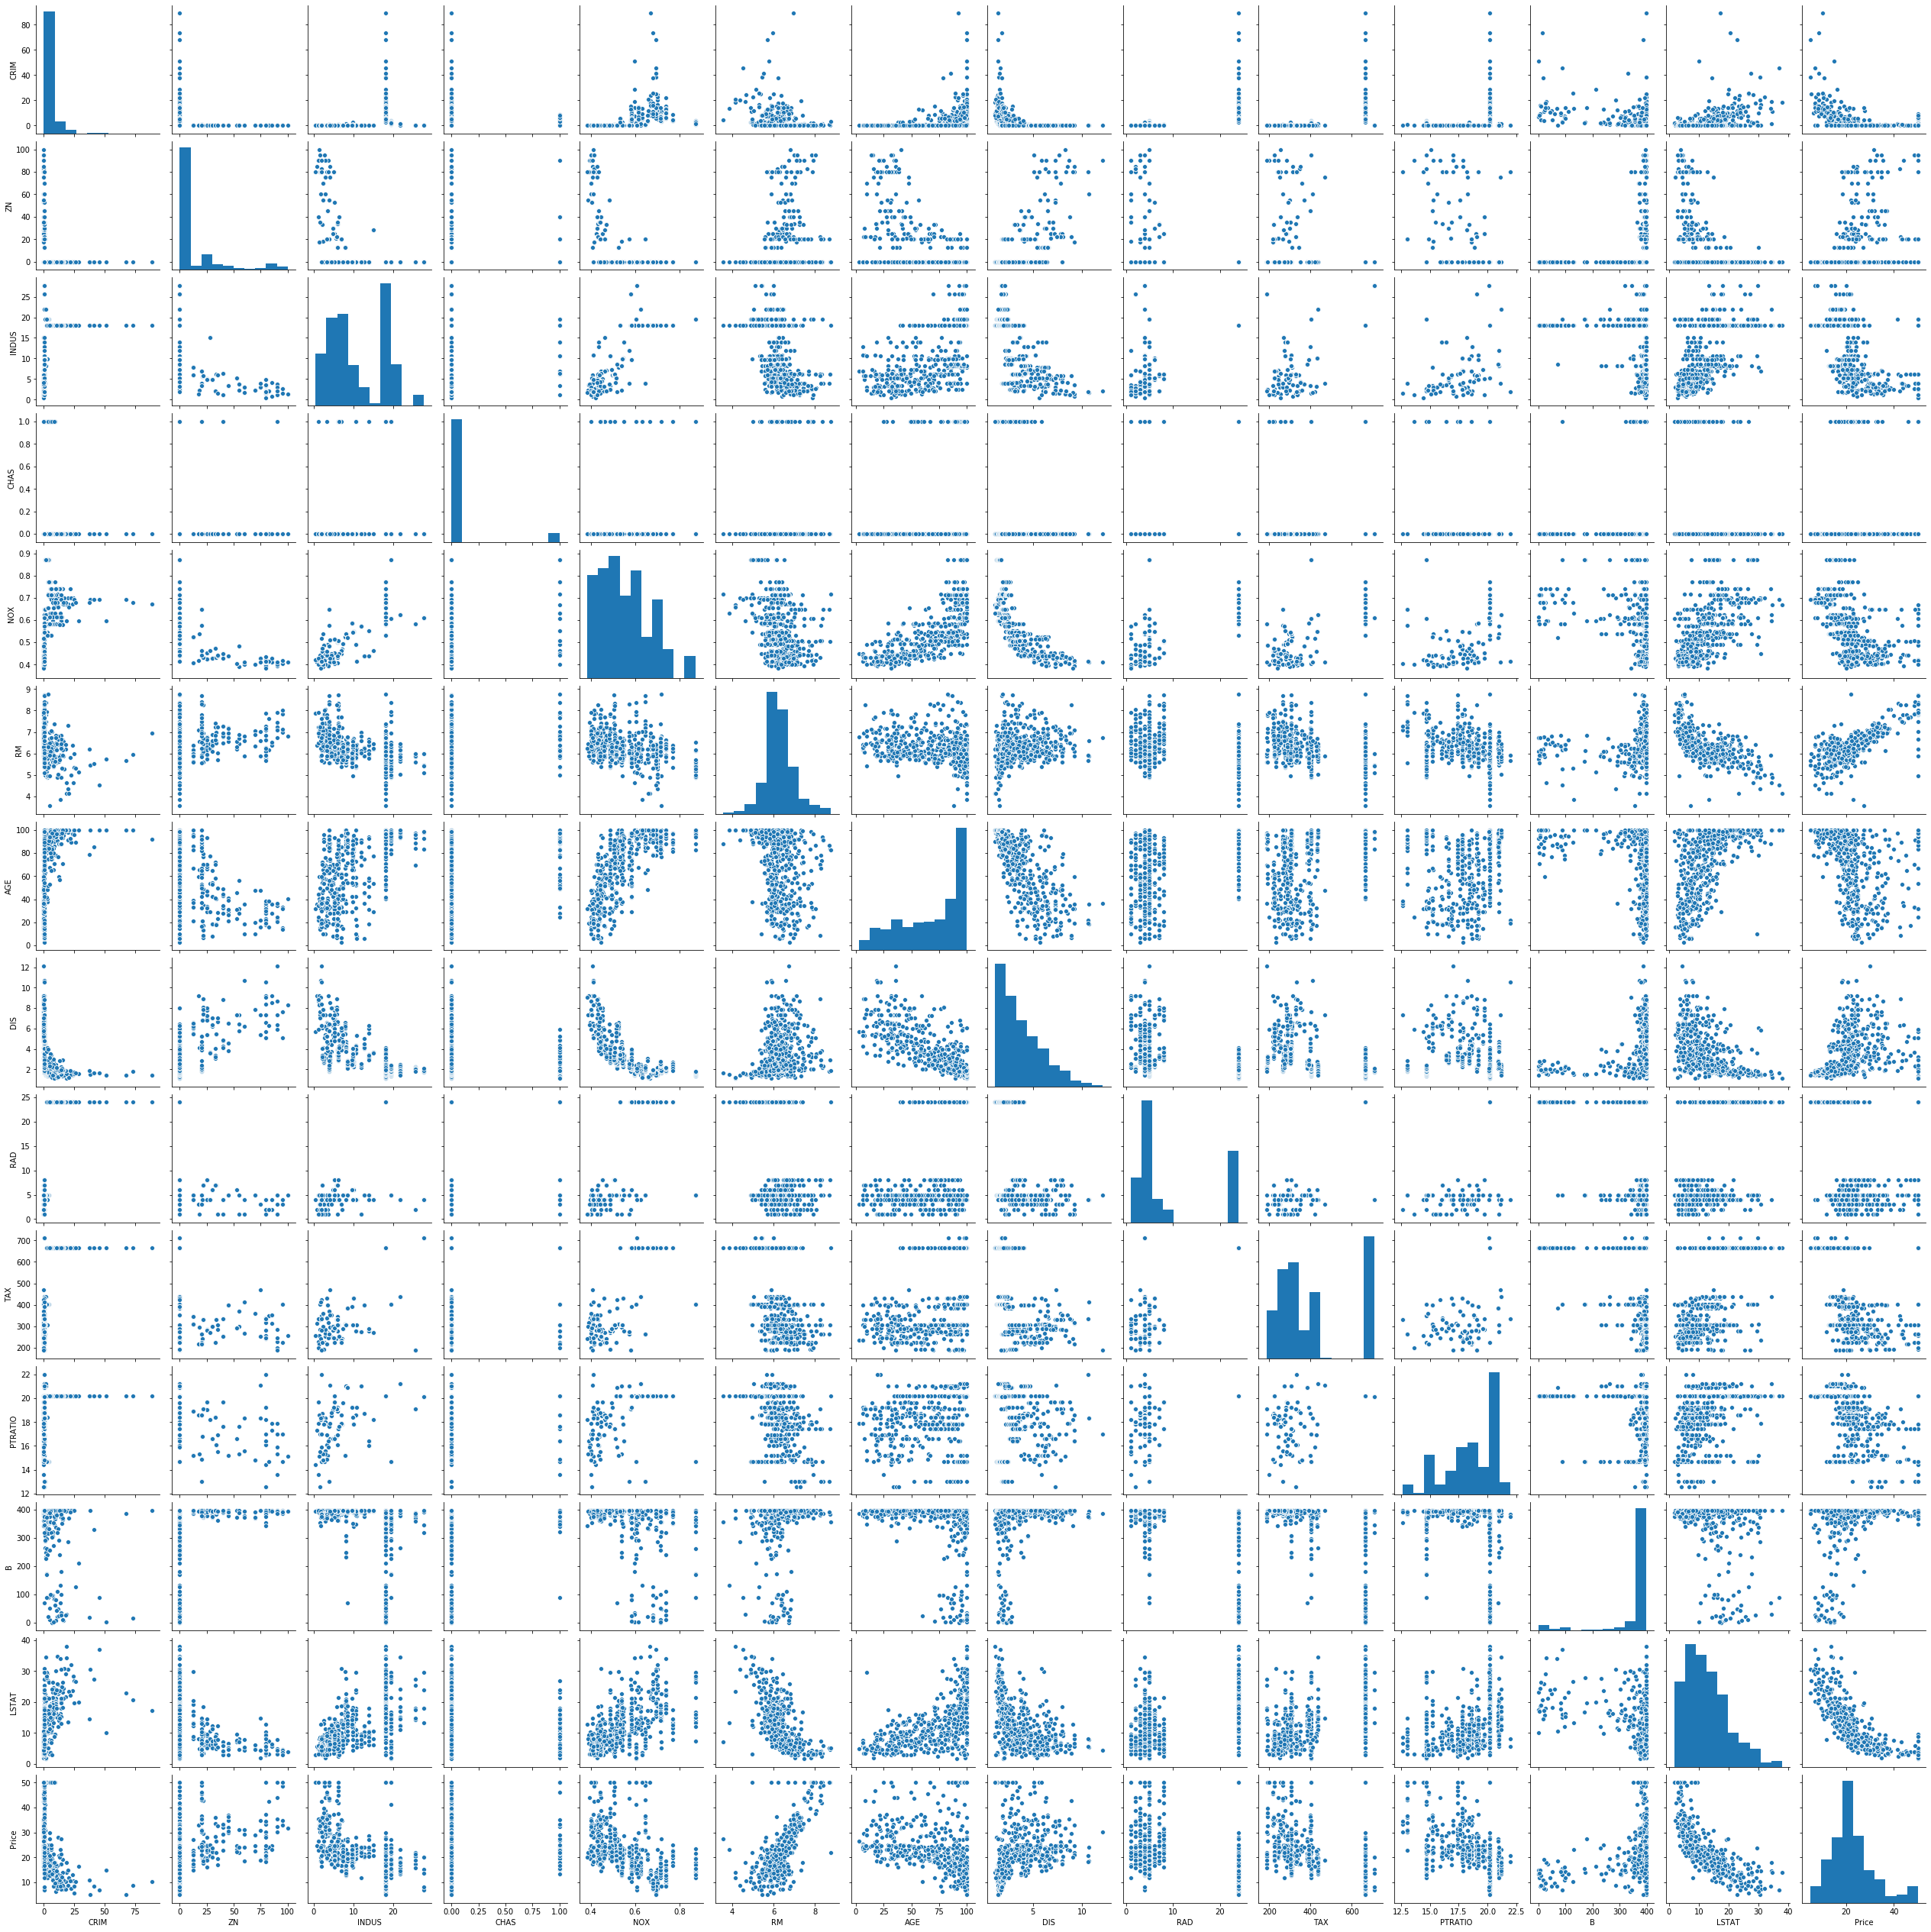

In [93]:
g = sns.pairplot(bs)

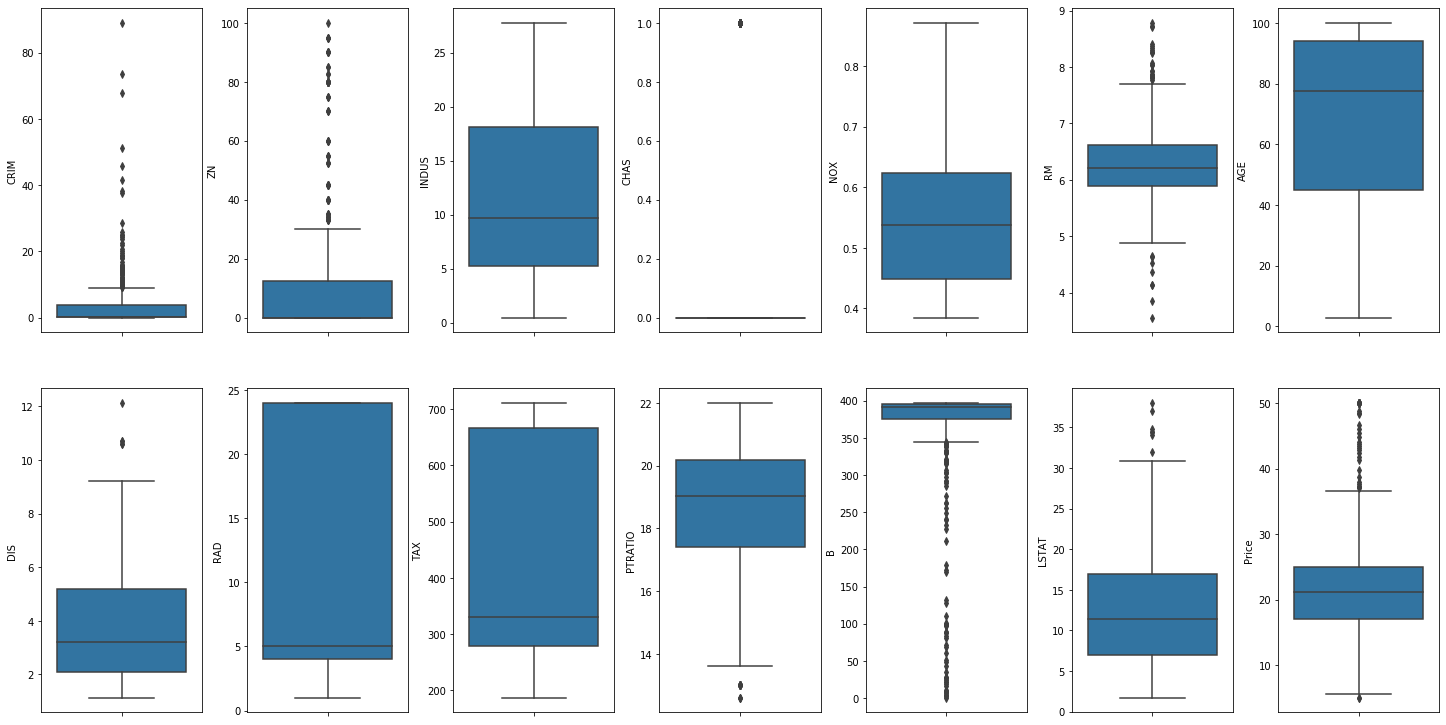

In [94]:
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
i = 0
ax = ax.flatten()
for m,n in bs.items():
    sns.boxplot(y=m, data=bs, ax=ax[i])
    i += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

Outliers
Outliers are present in high in number in CRM , Zn, RM, B
Moderate quantity of Outliers are present in Price, LSTAT, DIS

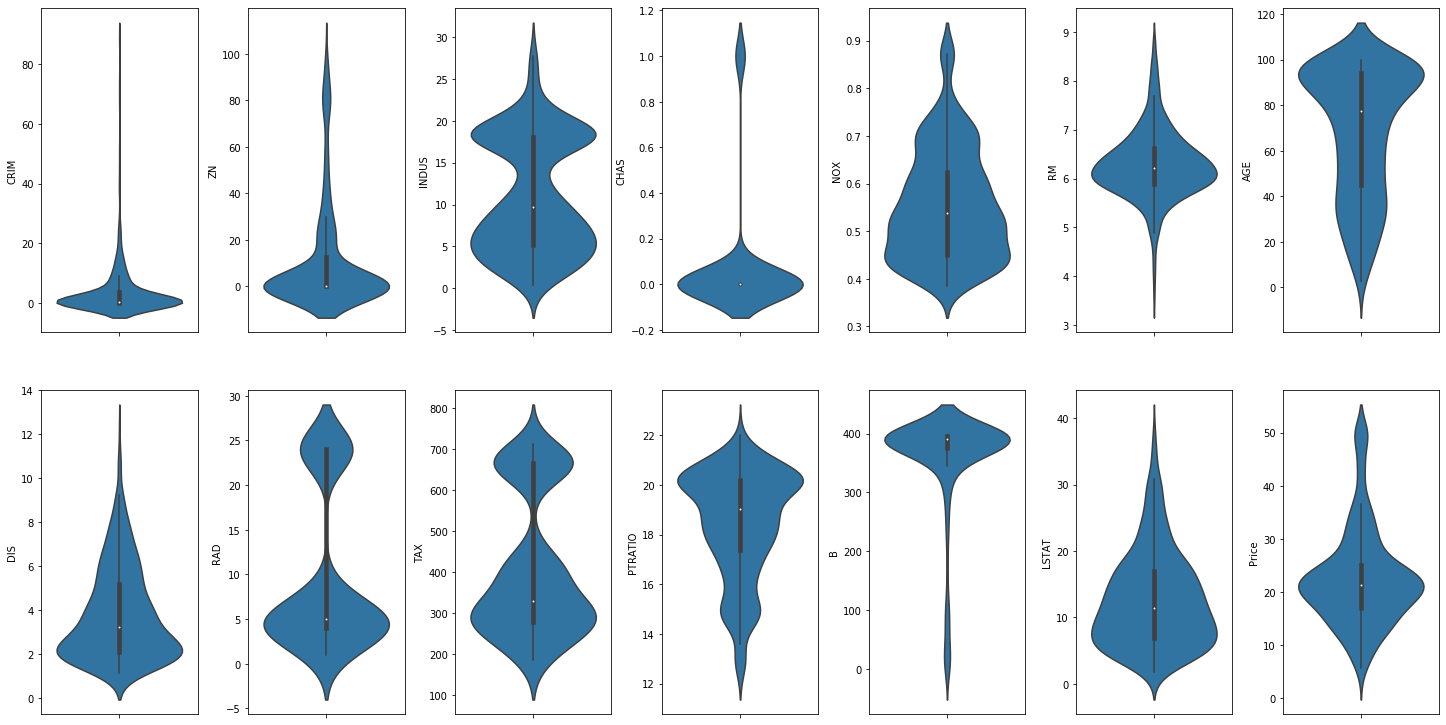

In [95]:
fig, ax = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
i = 0
ax = ax.flatten()
for m,n in bs.items():
    sns.violinplot(y=m, data=bs, ax=ax[i])
    i += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [96]:
bt = bs[['CRIM', 'ZN', 'INDUS',  'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'LSTAT', 'Price']]
bt.head(5)

CRIM    ZN  INDUS    NOX     RM   AGE     DIS  RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31  0.538  6.575  65.2  4.0900  1.0  296.0     15.3   
1  0.02731   0.0   7.07  0.469  6.421  78.9  4.9671  2.0  242.0     17.8   
2  0.02729   0.0   7.07  0.469  7.185  61.1  4.9671  2.0  242.0     17.8   
3  0.03237   0.0   2.18  0.458  6.998  45.8  6.0622  3.0  222.0     18.7   
4  0.06905   0.0   2.18  0.458  7.147  54.2  6.0622  3.0  222.0     18.7   

   LSTAT  Price  
0   4.98   24.0  
1   9.14   21.6  
2   4.03   34.7  
3   2.94   33.4  
4   5.33   36.2

In [100]:
x = bt.drop(['Price'],axis = 1)
y = bt['Price']

In [101]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_sc =sc.fit_transform(x)

In [102]:
x_train,x_test,y_train,y_test = train_test_split(x_sc,y,test_size = 0.2,random_state = 123)

In [103]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 11)
(102, 11)
(404,)
(102,)


In [107]:
from sklearn.model_selection import KFold, cross_val_score

In [110]:
lr = LinearRegression()
kf = KFold(n_splits = 10)
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [113]:
scores = cross_val_score(lr,x_train,y_train,cv = kf, scoring='neg_mean_squared_error')

array([-20.7585434 , -29.93745974,  -8.23445001, -19.03934339,
       -38.818774  , -17.68845741, -15.77649785, -22.0296996 ,
       -30.33513036, -26.38705798])

In [118]:
scores_map = {}
scores_map['Linear Regression'] = scores

In [120]:
from sklearn.tree import DecisionTreeRegressor
dt = LinearRegression()
kf = KFold(n_splits = 10)
dt.fit(x_train,y_train)
scores = cross_val_score(dt,x_train,y_train,cv = kf, scoring='neg_mean_squared_error')
scores_map['Decision Tree'] = scores

In [123]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
kf = KFold(n_splits = 10)
dt.fit(x_train,y_train)
scores = cross_val_score(knn,x_train,y_train,cv = kf, scoring='neg_mean_squared_error')
scores_map['KNN'] = scores

In [124]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
svr = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr.fit(x_train,y_train)
scores = cross_val_score(svr,x_train,y_train,cv = kf, scoring='neg_mean_squared_error')
scores_map['SVR'] = scores

In [126]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(alpha=0.9,learning_rate=0.05, 
                                max_depth=2, min_samples_leaf=5, 
                                min_samples_split=2, n_estimators=100, 
                                random_state=123)
gb.fit(x_train,y_train)
scores = cross_val_score(gb,x_train,y_train,cv = kf, scoring='neg_mean_squared_error')
scores_map['XGB Regressor'] = scores

In [127]:
scores_map

{'Linear Regression': array([-20.7585434 , -29.93745974,  -8.23445001, -19.03934339,
        -38.818774  , -17.68845741, -15.77649785, -22.0296996 ,
        -30.33513036, -26.38705798]),
 'Decision Tree': array([-20.7585434 , -29.93745974,  -8.23445001, -19.03934339,
        -38.818774  , -17.68845741, -15.77649785, -22.0296996 ,
        -30.33513036, -26.38705798]),
 'KNN': array([ -7.74870244, -27.72324878,  -5.45780488, -15.1361561 ,
        -24.74056   , -14.14564   ,  -5.84806   , -14.66282   ,
        -34.24663   , -20.40406   ]),
 'SVR': array([ -8.99655977, -17.20752166,  -5.53449329, -10.52684363,
         -7.28192552, -16.13068146, -11.56824458, -11.10089812,
        -25.56632092, -12.58528255]),
 'XGB Regressor': array([ -8.97167951, -14.95384291,  -5.27021244,  -7.5070936 ,
        -15.91661121, -10.37365295,  -6.20450496, -10.99567779,
        -27.54119048,  -8.87720645])}

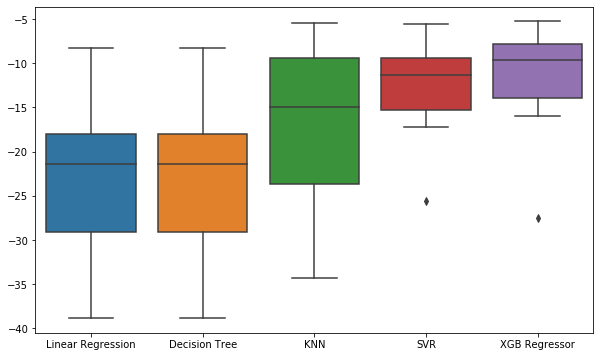

In [128]:
plt.figure(figsize=(10, 6))
scores_map = pd.DataFrame(scores_map)
sns.boxplot(data=scores_map)


In [138]:
print("Linear Regression: %0.2f " % (scores[0].mean()))
print("Decision Tree: %0.2f " % (scores[1].mean()))
print("KNN: %0.2f  " % (scores[2].mean()))
print("SVR: %0.2f  " % (scores[3].mean()))
print("XGB Regressor: %0.2f" % (scores[4].mean()))

Linear Regression: -8.97 
Decision Tree: -14.95 
KNN: -5.27  
SVR: -7.51  
XGB Regressor: -15.92


It can be observed that XGB Regressor performs better